## 1. (Computation) Model Problem and Jacobi Method

One source of very large linear systems is the discretization of boundary value problems, either ordinary differential
equations (ODEs) or partial differential equations (PDEs).  We consider the following model problem.  Given a function $f(x)$  find the unknown function $u(x)$ that satisfies the boundary value problem: 
$$
- u''(x) = f(x) \text{ for } 0 < x < 1
$$
with boundary conditions $u(0) = u(1) = 0.$  We create a vector $u,$ where $u_j$ approximates the value of $u$ at the 
point $x_j = j  h$ for $j = 0, \dots, n+1$ where $h = \frac{1}{n+1}.$  
We create a linear system by using the center
difference approximation for $-u''$ giving the system of equations
$$
\frac{-u_{j+1} + 2 u_j - u_{j-1}}{h^2} = f(x_j)  \text{ for } 
j = 1, \dots, n
$$
To satisfy the boundary conditions, we have $u_0 = u_{n+1} = 0,$
and we only store the $n$ values $u_1, \dots u_n$ as variables.

1. Create the system $A u = f$ with
```
A = np.zeros((n, n))
np.fill_diagonal(A, 2) 
np.fill_diagonal(A[1:], -1)     # Subdiagonal
np.fill_diagonal(A[:, 1:], -1)  # Superdiagonal
A *= (n+1)**2 
x = np.linspace(0,1,n+2)
x = x[1:-1]  # Exclude endpoints
u_exact = np.sin(2*np.pi*x) + np.sin(7*np.pi*x)
f = A@u_exact
```
Plot the exact solution given by $u_{exact}$ with $n=100.$

2. Implement the Jacobi iteration, start from the initial guess `u = np.zeros(n)`
and compute 50 iterations, again with $n= 100.$  Plot the error $u_{exact} - u$ after those 50 iterations.  On the same plot, also plot the error after 100 and 150 iterations.  What qualitative behavior do you notice for the error compared to the initial error $u_{exact}$?  Think about the contributions from the two sinusoidal terms.

3. Inside your Jacobi iteration loop, store the $\ell_2$ norm of the error and plot this norm as a function of
the iteration number $i$ in a `semilogy` plot for 300 iterations.

Text(0, 0.5, 'Error Norm')

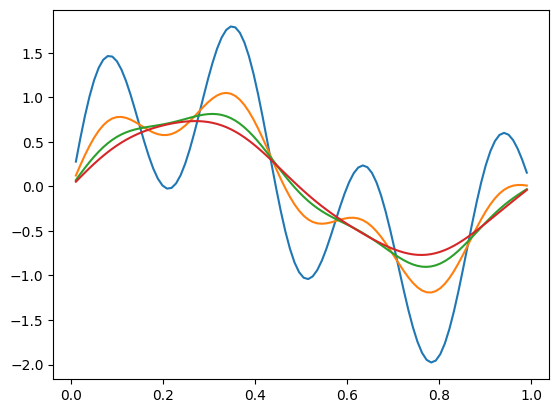

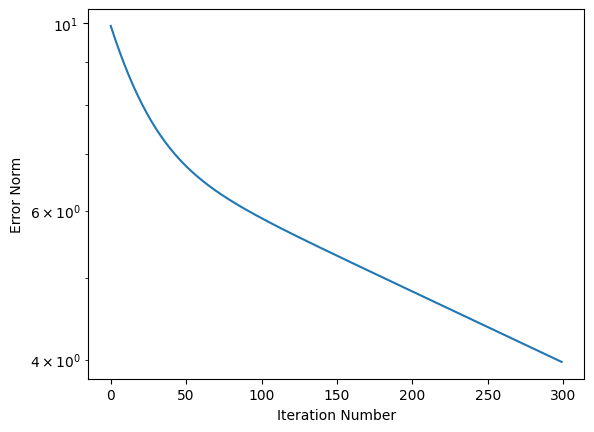

In [29]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

A = np.zeros((n, n))
np.fill_diagonal(A, 2) 
np.fill_diagonal(A[1:], -1)     # Subdiagonal
np.fill_diagonal(A[:, 1:], -1)  # Superdiagonal
A *= (n+1)**2 
x = np.linspace(0,1,n+2)
x = x[1:-1]  # Exclude endpoints
u_exact = np.sin(2*np.pi*x) + np.sin(7*np.pi*x)
f = A@u_exact

# plot the exact solution
plt.plot(x, u_exact)

def jacobi(A, b, x, iterations):
    D = np.diag(A)
    U = np.triu(A, k=1)
    L = np.tril(A, k=-1)
    
    error_norms = []
    
    for i in range(iterations):
        x = (b - np.add(U,L)@x)/D
        error = u_exact - x
        error_norms.append(np.linalg.norm(error, ord=2))
    return x, error_norms

# plot the error
u = np.zeros(n)
plt.plot(x, u_exact - jacobi(A, f, u, 50)[0])
plt.plot(x, u_exact - jacobi(A, f, u, 100)[0])
plt.plot(x, u_exact - jacobi(A, f, u, 150)[0])

# 2. The exact solution is a noisy sin wave, but as more iterations of the jacobi method are performed, we see in the plots of the error that this wave flattens out. If we think about the original two contributing sinusoidal waves, the higher frequency wave flattens out quickly while the lower frequency wave persists for longer.

_, error_norms = jacobi(A, f, u, 300)
plt.figure()
plt.semilogy(range(300), error_norms)
plt.xlabel('Iteration Number')
plt.ylabel('Error Norm')



## 2. (Theory) Convergence of the Jacobi Method

The Jacobi Method finds an approximate solution to 
$A x = b$ by splitting $A = D + L + U,$ and creating the iteration
$$x^{(k+1)} = D^{-1} ( b - (L+U) x^{(k)}) \text{ for } k = 0,1,2,\dots$$
1. Let $x$ denote the exact solution, and $e_k = x - x_k$ be the 
error vector.  Subtract $x$ from both sides of the iteration to get an expression of the form $e_{k+1} = R_J e_k,$ where $R_J$ is a matrix.

2. We say that $A$ is strictly diagonally dominant if for 
each row $i$
$$ |a_{ii}| > \sum_{\substack{j=1 \\ j \neq i}}^n |a_{ij}|.$$  
If $A$ is strictly diagonally
dominant, show that $\|R_J\|_\infty < 1.$

3. Use the previous two parts to show that the Jacobi method converges if $A$ is strictly diagonally dominant.  (Hint: use the 
inequality $\| Bx \|_\infty \leq \| B \|_\infty \| x \|_\infty$ for any matrix $ B$)

### 1.
$$e_k = x - x_k$$
$$x = D^{-1}(b-(L+U)x)$$
$$x^{(k+1)}=D^{-1}(b-(L+U)x^{(k)})$$
$$x^{(k+1)} - x=D^{-1}(b-(L+U)x^{(k)}) - x$$
$$x^{(k+1)} - x=D^{-1}(b-(L+U)x^{(k)}) - D^{-1}(b-(L+U)x)$$
$$x^{(k+1)} - x=D^{-1}(-(L+U)x^{(k)} + (L+U)x)$$
$$x - x^{(k+1)}=-D^{-1}(L+U)(x-x^{(k)})$$
$$\boxed{e_{k+1}=-D^{-1}(L+U)e_k}$$
$e_{k+1}=R_Je_k$ where $R_J = -D^{-1}(L+U)$


### 2.
We are given that $A$ is strictly diagonally dominant, therefore:
$$ |a_{ii}| > \sum_{\substack{j=1 \\ j \neq i}}^n |a_{ij}| \quad \text{for all } i $$
$$ 1 > \sum_{\substack{j=1 \\ j \neq i}}^n \frac{|a_{ij}|}{|a_{ii}|} \quad \text{for all } i$$ 
The definition of the infinity norm is sum of the absolute values of the elements in each row: 
$$\|A\|_\infty = \max_{i=1, \dots, n}{\sum_{j=1}^{n}{|a_{ij}|}}$$
Applying this to the strictly diagonally dominant matrix $A$ we have:
$$ \|R_{J}\|_\infty = \max_{i=1, \dots, n} \sum_{\substack{j=1 \\ j \neq i}}^n \frac{|a_{ij}|}{|a_{ii}|} < 1$$

### 3.
$$e_{k+1}=R_Je_k$$
$$\|e_{k+1}\|_\infty = \|R_Je_k\|_\infty$$
$$\|e_{k+1}\|_\infty \leq \|R_J\|_\infty \|e_k\|_\infty$$
Because $A$ is strictly diagonally dominant, we have $\|R_J\|_\infty < 1$ which gives us:
$$\|e_{k+1}\|_\infty \leq \|R_J\|_\infty \|e_k\|_\infty < \|e_k\|_\infty$$
$$\|e_{k+1}\|_\infty < \|e_k\|_\infty$$
As we can see, the error norm is decreasing with each iteration, therefore the Jacobi method converges to the exact solution if $A$ is strictly diagonally dominant.